<a href="https://colab.research.google.com/github/Karthik0042/MA5755_Intro-to-Machine-Learning/blob/main/LogisticRegression_MA5755.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3 (Logistic Regression)

## Intialising the datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the dataset
df = pd.read_csv("smarket.csv")

# Mapping the dataset with 0's and 1's so that we have all numeric data

df['Direction'] = df['Direction'].map({'Up': 1, 'Down': 0})

#Getting the coorelation_matrix
corrm = df.iloc[:, 1:].corr()


# Split the dataset into training (years 2001 to 2004) and testing (year 2005) subsets
train_data = df[df['Year'] < 2005]
test_data = df[df['Year'] == 2005]

# Extract features and target variable for training and testing
X_train = train_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_train = train_data['Direction'].values
X_test = test_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_test = test_data['Direction'].values

## Functions


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fullGradient(w, X, y):
    N = len(y)
    grad = np.dot(X.T, sigmoid(np.dot(X, w)) - y) / N
    return grad

def randGradient(w, X, y, n):
    grad = (sigmoid(np.dot(X[n], w)) - y[n]) * X[n]
    return grad

def fdescent(X, y, rho, job, nEpoch):
    global indices
    N = X.shape[0]
    D = X.shape[1]
    w = np.zeros(D)  # Initial parameters set to 0
    f_history = []

    for epoch in range(nEpoch):
        if job == 'full':
            grad = fullGradient(w, X, y)
            indices = range(N)
        elif job == 'stochastic':
            indices = np.random.permutation(N)

        for n in indices:
            if job == 'stochastic':
                grad = randGradient(w, X, y, n)
            w -= rho(epoch * N + n + 1) * grad
            f_history.append(-np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w)))))

    return w, f_history

def learning_rate_schedule(t):
    return 1 / np.sqrt(t)

def predict(X, w):
    probabilities = sigmoid(np.dot(X, w))
    predictions = np.round(probabilities)
    return probabilities, predictions

## Testing and predictions

In [ ]:
w_final_full, f_history_full = fdescent(X_train, y_train, learning_rate_schedule, 'full', nEpoch=3)


w_final_stochastic, f_history_stochastic = fdescent(X_train, y_train, learning_rate_schedule , 'stochastic',nEpoch = 3)

<ipython-input-3-6c5ca0637ff5>:31: RuntimeWarning: divide by zero encountered in log
  f_history.append(-np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w)))))
<ipython-input-3-6c5ca0637ff5>:31: RuntimeWarning: invalid value encountered in multiply
  f_history.append(-np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w)))))


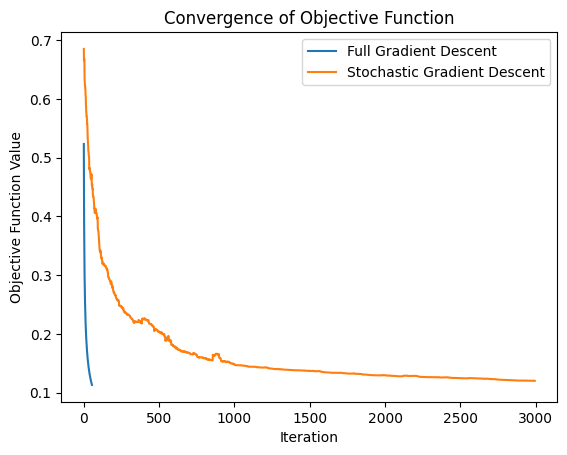

In [ ]:
plt.plot(f_history_full, label='Full Gradient Descent')
plt.plot(f_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence of Objective Function')
plt.legend()
plt.show()


In [ ]:
prob_full, pred_full = predict(X_test, w_final_full)
prob_stochastic, pred_stochastic = predict(X_test, w_final_stochastic)

In [ ]:
results_table = pd.DataFrame({
    'Probabilities (Full Gradient Descent)': prob_full,
    'Predictions (Full Gradient Descent)': pred_full,
    'Probabilities (Stochastic Gradient Descent)': prob_stochastic,
    'Predictions (Stochastic Gradient Descent)': pred_stochastic,
    'Actual Direction': y_test
})

# Count misclassified days
misclassified_days = len(results_table[results_table['Predictions (Full Gradient Descent)'] != results_table['Actual Direction']])
print("Misclassified Days:", misclassified_days)

Misclassified Days: 2


In [ ]:
accuracy_full = np.mean(pred_full == y_test)
print("Accuracy (Full Gradient Descent):", accuracy_full)


accuracy_stochastic = np.mean(pred_stochastic == y_test)
print("Accuracy (Stochastic Gradient Descent):", accuracy_stochastic)



Accuracy (Full Gradient Descent): 0.9920634920634921
Accuracy (Stochastic Gradient Descent): 0.9880952380952381


## Corr Matrix

In [ ]:
df = df.drop('Year', axis=1)
corr_matrix = df.corr()

print(corr_matrix)

               Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Lag1       1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2      -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3      -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4      -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5      -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume     0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today     -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   
Direction -0.039757 -0.024081  0.006132  0.004215  0.005423  0.022951   

              Today  Direction  
Lag1      -0.026155  -0.039757  
Lag2      -0.010250  -0.024081  
Lag3      -0.002448   0.006132  
Lag4      -0.006900   0.004215  
Lag5      -0.034860   0.005423  
Volume     0.014592   0.022951  
Today      1.000000   0.730563  
Direction  0.730563   1.000000  


In [ ]:
'''Answers'''
# Misclassified Days: 2
#Accuracy (Full Gradient Descent): 0.9920634920634921
#Accuracy (Stochastic Gradient Descent): 0.9880952380952381

'Answers'